# SciKit-RT workshop 19/01/21

## Images

### Loading an image from a dicom file

In [1]:
from skrt import Image

im = Image("sample_data/head_and_neck/CT/image")
im


Image
{
  affine: (4, 4) array 
  data: (256, 256, 126) array 
  date: '' 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  doses: [] 
  downsampling: None 
  files: [126 * <class 'skrt.core.File'>] 
  image_extent: [3 * <class 'tuple'>] 
  lims: [3 * <class 'tuple'>] 
  n_voxels: [3 * <class 'int'>] 
  nifti_array: False 
  origin: [3 * <class 'numpy.float64'>] 
  path: '/Users/hannahpullen/Work/Workshop/sample_data/head_and_neck/CT/image' 
  plot_extent: {3 * keys of type <class 'str'>} 
  print_depth: 0 
  source: 'sample_data/head_and_neck/CT/image' 
  source_type: 'dicom' 
  structure_sets: [] 
  subdir: '' 
  time: '' 
  timestamp: '' 
  title: 'image' 
  voxel_size: [3 * <class 'numpy.float64'>] 
}

### Press `tab` to see possible functions

In [ ]:
im.

In [37]:
# Examine its properties
print("Voxel size:", im.get_voxel_size())
print("Origin:", im.get_origin())
print("Number of voxels:", im.get_n_voxels())

Voxel size: [2.148, 2.148, 3.0]
Origin: [-274.46301269531, -274.46301269531, -252.0]
Number of voxels: [256, 256, 126]


numpy.ndarray

In [39]:
# Access the image array
data = im.get_data()
data.shape

(256, 256, 126)

### Plotting an image

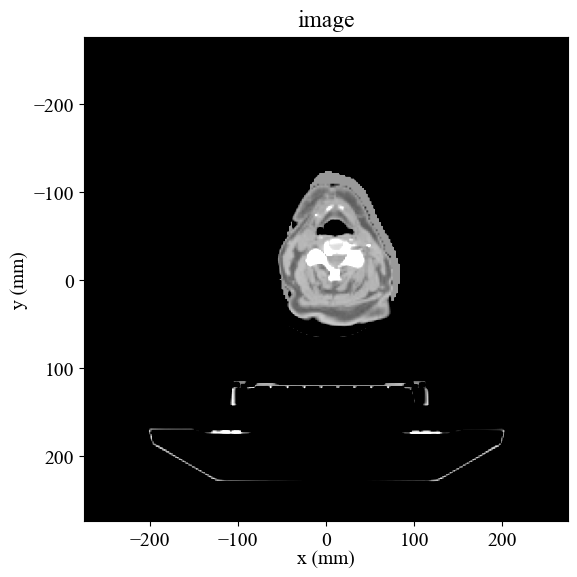

In [40]:
im.plot()

### Customising the plot

In [31]:
# Use python's "help" function for documentation
help(im.plot)

Help on method plot in module skrt.image:

plot(view='x-y', sl=None, idx=None, pos=None, scale_in_mm=True, ax=None, gs=None, figsize=6, save_as=None, zoom=None, zoom_centre=None, intensity=None, mpl_kwargs=None, show=True, colorbar=False, colorbar_label=None, title=None, no_ylabel=False, annotate_slice=False, major_ticks=None, minor_ticks=None, ticks_all_sides=False, no_axis_labels=False, rois=None, roi_plot_type='contour', consensus_type=None, exclude_from_consensus=None, consensus_color='white', consensus_linewidth=None, legend=False, roi_kwargs=None, centre_on_roi=None, legend_loc='lower left', dose=None, dose_opacity=0.5, dose_kwargs=None, flatten=False, xlim=None, ylim=None, zlim=None, shift=[None, None, None]) method of skrt.image.Image instance
    Plot a 2D slice of the image.
    
    **Parameters:**
    
    view : str, default='x-y'
        Orientation in which to plot the image. Can be any of 'x-y',
        'y-z', and 'x-z'.
    
    sl : int, default=None
        Slice num

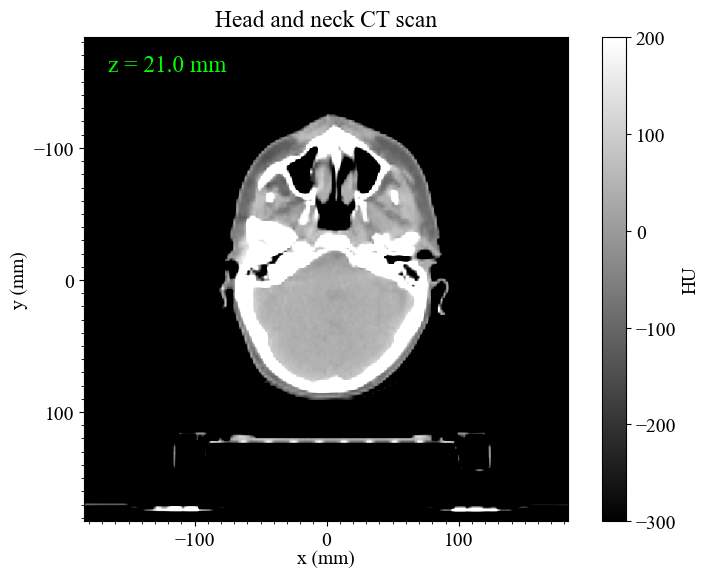

In [35]:
# Plotting with extra arguments
im.plot(
    pos=20,
    annotate_slice='lime',
    zoom=1.5,
    colorbar=True,
    title='Head and neck CT scan',
    major_ticks=100,
    minor_ticks=10
)

### Interactive plotting with `view()`

In [67]:
im.view()

Output()

### Writing an image

In [43]:
im.write("my_image.nii")    # nifti
im.write("my_image_dicom")  # dicom

Wrote to NIfTI file: my_image.nii
Wrote dicom file(s) to directory: my_image_dicom


### Comparing two images

In [5]:
# Load MVCT scans from different treatment days
im1 = Image("sample_data/head_and_neck/MVCT/1/image", title="MVCT 1")
im2 = Image("sample_data/head_and_neck/MVCT/2/image", title="MVCT 2")

In [7]:
# View side-by-side
im1.view(images=im2)

Output()

In [8]:
# Create a comparison image
im1.view(images=im2, comparison=True)

Output()

In [9]:
# View the comparison image only
im1.view(images=im2, comparison=True, comparison_only=True)

Output()

## Structure sets and ROIs

- Loading from dicom
- Print ROIs
- Plot/view

- Get a specific ROI
- Note contour and mask representations (show both)
- Get geometric properties
- Get ROI comparisons

- Open another StructureSet
- Note names mismatch! Mention filtering, colouring, etc
- Get ROI comparison table for all, save to csv, etc
- Interactive comparison viewing

- Loading from nifti
- Consensus of ROIs; plotting; comparing each to consensus of others

### Load a structure set from dicom

In [2]:
from skrt import StructureSet

structs = StructureSet("sample_data/head_and_neck/CT/RTSTRUCT.dcm")
structs


StructureSet
{
  colors: None 
  date: '' 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  files: [] 
  ignore_dicom_colors: False 
  image: None 
  keep_renamed_only: False 
  loaded: True 
  multi_label: False 
  name: None 
  names: None 
  path: '/Users/hannahpullen/Work/Workshop/sample_data/head_and_neck/CT/RTSTRUCT.dcm' 
  print_depth: 0 
  roi_kwargs: {} 
  rois: [9 * <class 'skrt.structures.ROI'>] 
  sources: [1 * <class 'str'>] 
  subdir: '' 
  time: '' 
  timestamp: '' 
  to_keep: None 
  to_remove: None 
}

### Print ROI names

In [3]:
structs.print_rois()

Alterio PCs
cricopharyngeus
IPC
left parotid
MPC
oral cavity
right parotid
SG larynx
SPC


### View the entire structure set

In [4]:
structs.view()

Output()

### Access a single ROI

In [5]:
rois = structs.get_rois()
rois

[
 ROI
 {
   affine: None 
   color: (1.0, 0.0, 0.0, 1) 
   contours: {1 * keys of type <class 'str'>} 
   contours_only: True 
   custom_color: True 
   date: '' 
   default_geom_method: 'contour' 
   dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
   empty: False 
   files: [] 
   image: None 
   input_contours: {29 * keys of type <class 'float'>} 
   kwargs: {} 
   loaded: True 
   loaded_mask: False 
   mask: None 
   mask_threshold: 0.25 
   name: 'Alterio PCs' 
   number: 0 
   origin: None 
   original_name: 'Alterio PCs' 
   overlap_level: None 
   path: '' 
   print_depth: 0 
   shape: None 
   source: None 
   source_type: 'contour' 
   structure_set: <class 'skrt.structures.StructureSet'> 
   subdir: '' 
   time: '' 
   timestamp: '' 
   title: None 
   voxel_size: None 
 },
 
 ROI
 {
   affine: None 
   color: (0.0, 1.0, 1.0, 1) 
   contours: {1 * keys of type <class 'str'>} 
   contours_only: True 
   custom_color: True 
   date: '' 
   default_geom_method: 'contour'

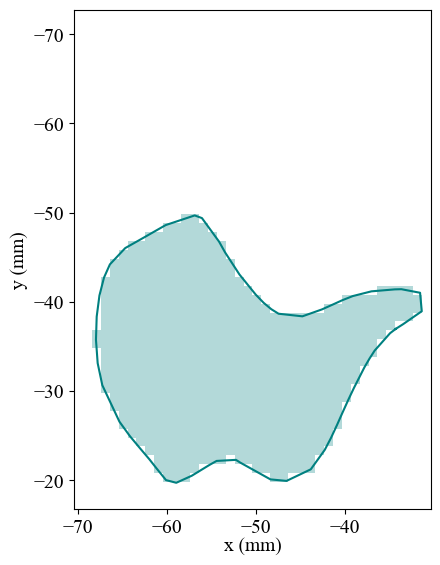

In [6]:
# Access by name
roi = structs.get_roi("right parotid")
roi.plot(plot_type='filled', color='teal')

### Access the raw data of an ROI
Two ways to represent an ROI:
- Lists of contour points on each slice
- Binary mask

In [7]:
# Contours
contours = roi.get_contours()
contours

{-42.0: [array([[-45.45, -37.16],
         [-45.61, -36.93],
         [-47.62, -35.56],
         [-48.01, -35.43],
         [-51.77, -35.93],
         [-52.19, -36.85],
         [-52.31, -37.42],
         [-52.34, -39.41],
         [-52.13, -40.82],
         [-51.77, -42.15],
         [-50.98, -43.85],
         [-49.65, -45.67],
         [-48.56, -46.87],
         [-47.85, -47.64],
         [-47.49, -48.  ],
         [-44.79, -49.69],
         [-43.45, -49.66],
         [-40.65, -48.37],
         [-40.08, -45.74],
         [-40.31, -45.37],
         [-41.56, -43.78],
         [-43.1 , -41.97],
         [-44.04, -39.89]])],
 -39.0: [array([[-40.93, -40.17],
         [-41.18, -39.18],
         [-41.37, -37.06],
         [-41.59, -36.31],
         [-42.65, -34.9 ],
         [-44.42, -33.11],
         [-44.73, -32.73],
         [-45.87, -31.25],
         [-47.24, -30.28],
         [-48.17, -30.12],
         [-50.43, -30.16],
         [-52.33, -30.09],
         [-54.8 , -29.67],
         [-

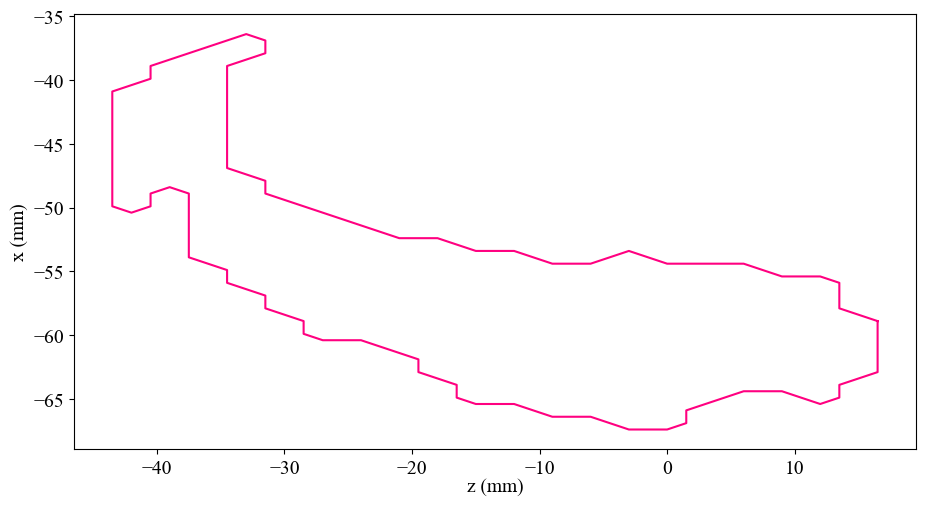

In [8]:
# Can also get contours in different orientations: 'x-y' (axial), 'x-z' (coronal), or 'y-z' (sagittal)
contours_xz = roi.get_contours('x-z')
roi.plot('x-z')

In [9]:
# Binary mask
mask = roi.get_mask()
mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

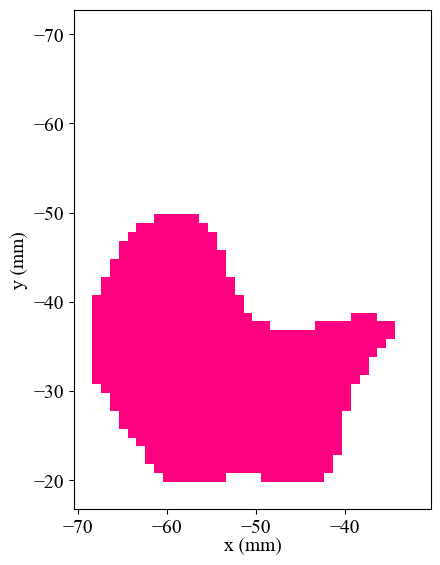

In [10]:
roi.plot(plot_type="mask")

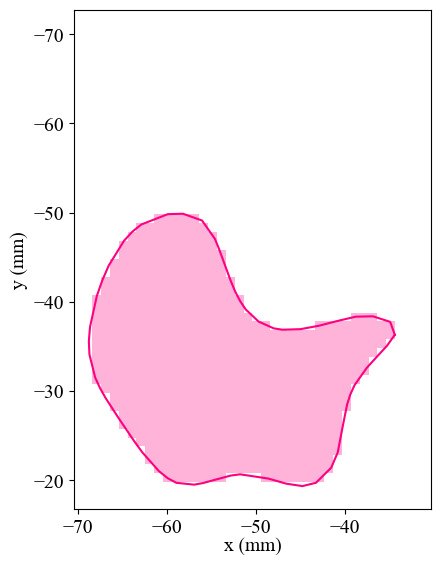

In [11]:
# Plot mask and contour together
roi.plot(plot_type="filled")

In [12]:
# Interactive viewing
roi.view()

Output()

### Get the geometric properties of an ROI

In [13]:
roi.get_

AttributeError: 'ROI' object has no attribute 'get_'

In [ ]:
print("Volume:", roi.get_volume())
print("Area on central slice:", roi.get_area())
print("Centroid position:", roi.get_centroid())

### Get geometric properties of all ROIs in the structure set

In [ ]:
structs.get_geometry()

In [ ]:
structs.get_geometry(
    metrics=["volume", "area", "length_z"], 
    decimal_places=2, 
    vol_units="ml"
)

In [14]:
# This output is a pandas DataFrame - can write to csv, tex, etc
df = structs.get_geometry()
df.to_csv('geometric_data.csv')

### Assigning an Image to a StructureSet

Two ways:
- Use the `image` argument when creating the StructureSet
- Use the `set_image()` function on the StructureSet

In [15]:
from skrt import StructureSet
structs = StructureSet("sample_data/head_and_neck/CT/RTSTRUCT.dcm", image=im)

In [16]:
# View interactively with image
structs.view()

Output()

In [17]:
# View interactively with geometric data
structs.view(include_image=True, roi_info=True)

Output()

### Comparing ROIs

In [18]:
# Extract two ROIs from the structure set and compare them
right_parotid = structs.get_roi("right parotid")
left_parotid = structs.get_roi("left parotid")

print("Distance:", right_parotid.get_abs_centroid_distance(left_parotid))
print("Dice score:", right_parotid.get_dice(left_parotid))
print("Volume difference:", right_parotid.get_volume_diff(left_parotid))

Distance: 119.46615460504522
Dice score: 0.0
Volume difference: 0.34101414982219186


In [19]:
# Can also get comparison table as a DataFrame
right_parotid.get_comparison(left_parotid)

,dice,centroid_x,centroid_y,centroid_z
right parotid,0.0,119.093408,2.696598,9.036079


### Comparing one structure set to another

In [20]:
# Let's load one of the MVCT structure sets and print its ROIs...
structs_mv = StructureSet("sample_data/head_and_neck/MVCT/1/RTSTRUCT.dcm")
structs_mv.print_rois()

alterio_pc
mpc
oral_cavity
parotid_left
parotid_right
sg_larynx
smg_left
smg_right
spc
spinal_cord


In [21]:
# Let's look again at the ROIs in the kVCT structure set...
structs.print_rois()

Alterio PCs
cricopharyngeus
IPC
left parotid
MPC
oral cavity
right parotid
SG larynx
SPC


### Renaming and filtering ROIs

In [22]:
# Make a naming dictionary (note: case insensitive, * for wildcard)
# Maps desired name : potential input names

names = {
    'MPC': 'mpc',
    'Oral cavity': 'oral*cavity',
    'SPC': 'spc',
    'SG larynx': 'sg*',
    'Left parotid': ['left*parotid', 'parotid*left'],
    'Right parotid': ['right*parotid', 'parotid*right']
}

In [23]:
# Make a filtered copy of original structure set
structs_kv = structs.filtered_copy(names=names, keep_renamed_only=True)
structs_kv.print_rois()
structs_kv.view()

MPC
Oral cavity
SPC
SG larynx
Left parotid
Right parotid


Output()

In [24]:
# Could also load the StructureSet with the naming dictionary!
structs_mv = StructureSet(
    "sample_data/head_and_neck/MVCT/1/RTSTRUCT.dcm",  
    names=names, 
    keep_renamed_only=True,
    ignore_dicom_colors=True,
    image=im
)
structs_mv.print_rois()
structs_mv.view()

MPC
Oral cavity
SPC
SG larynx
Left parotid
Right parotid


Output()

In [25]:
# Get comparison table
structs_kv.get_comparison(
    structs_mv, 
    metrics=["dice", "centroid"],
    decimal_places=2
)

,dice,centroid_x,centroid_y,centroid_z
MPC,0.08,-4.22,5.26,-0.81
Oral cavity,0.85,-3.61,2.77,-3.55
SPC,0.13,-3.27,3.31,-1.86
SG larynx,0.36,-3.93,4.59,-0.43
Left parotid,0.58,-4.14,2.51,-1.20
Right parotid,0.71,-2.32,3.66,-1.54


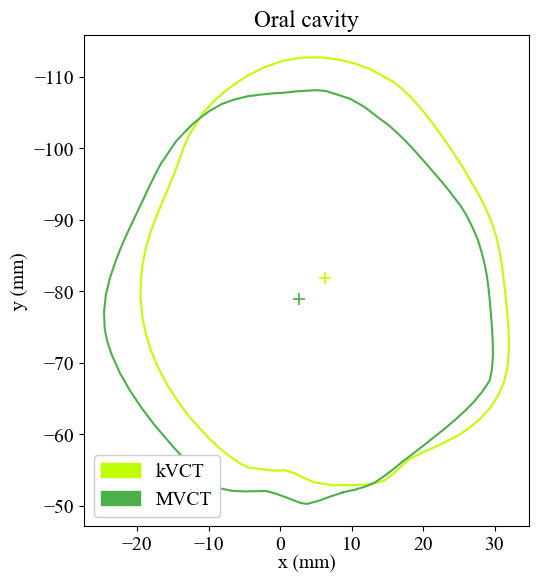

In [26]:
# Plot comparisons
roi = structs_kv.get_roi("Oral cavity")
roi2 = structs_mv.get_roi("Oral cavity")
roi.plot_comparison(roi2, names=['kVCT', 'MVCT'], plot_type='centroid')

In [27]:
# Interactively view both structure sets
im.view(rois=[structs_kv, structs_mv], compare_rois=['dice', 'dice_slice'])

/Users/hannahpullen/scikit-rt/src/skrt/structures.py:2185: RuntimeWarning: invalid value encountered in double_scalars
  return intersection / np.mean([area1, area2])


Output()

### Consensus contours

In [1]:
# Load ROIs from multiple nifti files
from skrt import StructureSet

iov = StructureSet("sample_data/rectum_iov/")
iov.print_rois()

Gill
Neil
Yvonne
Gail
Cathryn
Simon
Jessica
Luke
Rich
Alex


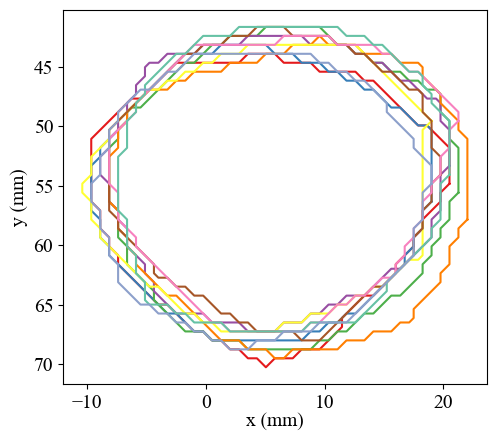

In [2]:
iov.plot(plot_type="contour", idx=7)

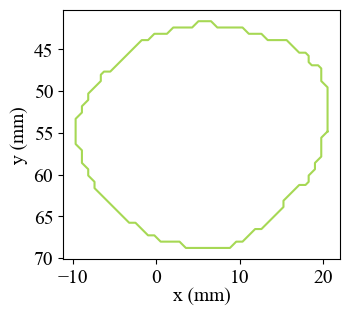

In [3]:
staple = iov.get_staple()
staple.plot(idx=7)

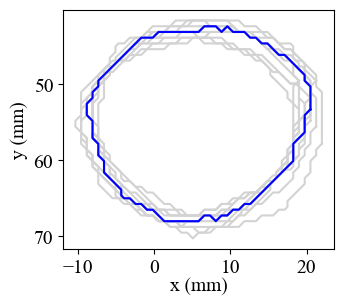

In [4]:
# Quick consensus plotting functions
iov.plot_consensus('majority', rois_in_background=True, color='blue', idx=7)

In [5]:
# Interactively compare each contour to the consensus of all others
iov.view(roi_plot_type='contour', roi_consensus=True, compare_rois=['dice', 'dice_slice'])

Output()

In [23]:
# Compare every ROI to the consensus of all others
iov.get_comparison(comp_type='consensus', consensus_type='majority')

,dice,centroid_x,centroid_y,centroid_z
Gill vs. majority_vote,0.840428,0.027627,-3.846349,-2.525686
Neil vs. majority_vote,0.912185,0.318173,-1.810738,-0.819392
Yvonne vs. majority_vote,0.932426,0.237604,0.075607,-0.363437
Gail vs. majority_vote,0.941994,-0.193147,-0.060081,0.161535
Cathryn vs. majority_vote,0.833493,-0.828206,0.749192,-1.095677
Simon vs. majority_vote,0.905800,0.413392,0.560927,0.498073
Jessica vs. majority_vote,0.845223,0.625998,1.237989,0.548508
Luke vs. majority_vote,0.914342,-0.455527,-0.538859,-1.620212
Rich vs. majority_vote,0.867190,-0.285715,1.074968,-2.969555
Alex vs. majority_vote,0.919541,0.059054,-0.157899,0.738259


### Loading ROIs from a multi-label array

In [1]:
# Try loading the output of an InnerEye segmentation...
from skrt import StructureSet
structs_innereye = StructureSet("sample_data/innereye/segmentation.nii.gz", 
                                image="sample_data/innereye/MVCT.nii.gz")
structs_innereye.view(roi_plot_type='mask')

Output()

In [5]:
# Load with the multi_label option
structs_innereye = StructureSet("sample_data/innereye/segmentation.nii.gz", 
                                image="sample_data/innereye/MVCT.nii.gz",
                                multi_label=True)
structs_innereye.view(roi_plot_type='mask')

Output()

In [7]:
# Set custom names
names = ["bladder", "femur1", "femur2", "prostate", "rectum"]
structs_innereye = StructureSet("sample_data/innereye/segmentation.nii.gz", 
                                image="sample_data/innereye/MVCT.nii.gz",
                                multi_label=True,
                                names=names
                               )
structs_innereye.view(roi_plot_type='mask')

Output()

## Dose maps

### Load a dose map from dicom

In [9]:
from skrt import Dose

dose = Dose("sample_data/head_and_neck/CT/RTDOSE.dcm")
dose.view(colorbar=True)

Output()

In [11]:
# Assign an image and view overlay
dose.set_image(im)
dose.view(include_image=True, title="Image with dose")

NameError: name 'im' is not defined

### Get dose inside an ROI

In [6]:
# Get mean dose in left parotid 

roi = structs_kv.get_roi("Left parotid")

print("mean dose:", dose.get_mean_dose(roi))

NameError: name 'structs_kv' is not defined

In [63]:
# Get dose inside every voxel in the ROI
print(dose.get_dose_in_roi(roi))

[0.90438618 0.42645578 0.63073302 ... 1.80417882 1.87044733 1.75851366]


### Plot dose-volume histogram

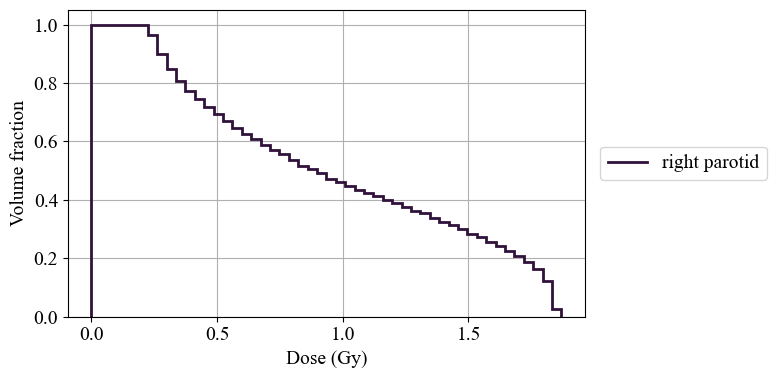

<AxesSubplot:xlabel='Dose (Gy)', ylabel='Volume fraction'>

In [80]:
dose.plot_DVH(roi)

## Image registration

- Making a Registration object
- Viewing and adding default parameter files
- Running the registration, viewing results
- Transforming a dose field (then compare)
- Transforming a structure set one way
- Compare
- Get consensus of both ways

### Create a Registration object

In [7]:
# First, set elastix directory if needed
from skrt.registration import set_elastix_dir
set_elastix_dir("/Users/hannahpullen/elastix-5.0.1-mac/")

In [8]:
# Create a Registration object
from skrt.registration import Registration

reg = Registration(
    'my_registration',
    fixed='sample_data/head_and_neck/MVCT/1/image/',
    moving='sample_data/head_and_neck/CT/image/',
    overwrite=True  # Remove any existing data
)

Wrote to NIfTI file: my_registration/fixed.nii.gz
Wrote to NIfTI file: my_registration/moving.nii.gz


In [9]:
# View the contents of the registration
reg


Registration
{
  capture_output: False 
  deformation_fields: {} 
  fixed_image: <class 'skrt.image.Image'> 
  fixed_path: 'my_registration/fixed.nii.gz' 
  jacobians: {} 
  log_level: 'WARNING' 
  logger: <Logger Registration (WARNING)> 
  moving_image: <class 'skrt.image.Image'> 
  moving_path: 'my_registration/moving.nii.gz' 
  outdirs: {} 
  path: 'my_registration' 
  pfiles: {} 
  print_depth: 0 
  steps: [] 
  steps_file: 'my_registration/registration_steps.txt' 
  tfiles: {} 
  transformed_images: {} 
}

In [10]:
# View input images
reg.view_init()

Output()

In [11]:
# View registration steps (none added yet!)
reg.steps

[]

In [12]:
# Let's look at the available default parameter files
reg.list_default_pfiles()

MSD_Translation
MI_Affine
MI_BSpline25
MI_BSpline30
MSD_Affine
NMI_BSpline30
NMI_BSpline25
NCC_Rigid
NMI_BSpline20
MI_BSpline20
MI_BSpline35
NCC_BSpline25
MSD_BSpline20
NCC_BSpline30
NCC_Translation
NMI_Affine
NCC_BSpline20
MSD_BSpline30
MSD_BSpline25
NCC_BSpline10
MI_Rigid
MI_Translation
MSD_BSpline15
NMI_Rigid
NCC_BSpline15
MSD_BSpline10
MI_BSpline10
NMI_BSpline10
NMI_Translation
NMI_BSpline15
NCC_Affine
MI_BSpline15
MSD_Rigid


In [13]:
# Inspect the contents of a default parameter file
reg.get_default_params("MI_Translation")

{'FixedInternalImagePixelType': 'float',
 'MovingInternalImagePixelType': 'float',
 'UseDirectionCosines': True,
 'Registration': 'MultiResolutionRegistration',
 'Interpolator': 'BSplineInterpolator',
 'ResampleInterpolator': 'FinalBSplineInterpolator',
 'Resampler': 'DefaultResampler',
 'FixedImagePyramid': 'FixedRecursiveImagePyramid',
 'MovingImagePyramid': 'MovingRecursiveImagePyramid',
 'Optimizer': 'AdaptiveStochasticGradientDescent',
 'Transform': 'TranslationTransform',
 'Metric': 'AdvancedMattesMutualInformation',
 'AutomaticScalesEstimation': True,
 'AutomaticTransformInitialization': True,
 'HowToCombineTransforms': 'Compose',
 'UseNormalization': True,
 'NumberOfHistogramBins': 32,
 'ErodeMask': True,
 'RequiredRatioOfValidSamples': 0.05,
 'NumberOfResolutions': 4,
 'ImagePyramidSchedule': [8, 8, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1],
 'MaximumNumberOfIterations': 250,
 'NumberOfSpatialSamples': 2048,
 'NewSamplesEveryIteration': True,
 'ImageSampler': 'Random',
 'BSplineInterpolat

In [14]:
# Add some parameter files to the registration
reg.add_default_pfile("MI_Translation")
reg.steps

['MI_Translation']

In [15]:
# Perform registration
reg.capture_output = True
reg.register(force=True)

In [16]:
# View the results
reg.view_result()

Output()

In [17]:
# Maybe we need to add another step! Add a BSpline (deformable) step
reg.add_default_pfile("MI_BSpline30")
reg.steps

['MI_Translation', 'MI_BSpline30']

In [18]:
reg.view_result()

Output()

In [1]:
# Load a pre-existing registration result
from skrt.registration import Registration
reg = Registration("my_registration")
reg


Registration
{
  capture_output: False 
  deformation_fields: {} 
  fixed_image: <class 'skrt.image.Image'> 
  fixed_path: 'my_registration/fixed.nii.gz' 
  jacobians: {} 
  log_level: 'WARNING' 
  logger: <Logger Registration (WARNING)> 
  moving_image: <class 'skrt.image.Image'> 
  moving_path: 'my_registration/moving.nii.gz' 
  outdirs: {2 * keys of type <class 'str'>} 
  path: 'my_registration' 
  pfiles: {2 * keys of type <class 'str'>} 
  print_depth: 0 
  steps: [2 * <class 'str'>] 
  steps_file: 'my_registration/registration_steps.txt' 
  tfiles: {2 * keys of type <class 'str'>} 
  transformed_images: {2 * keys of type <class 'str'>} 
}

### Transforming StructureSets
Image registration gives us a transform that maps each position in the **fixed image** to its corresponding location in the **moving image**. This gives us two ways to transform contours:

1. **Pull** contours from moving image to fixed image by resampling the contour binary mask into the fixed image's frame of reference.

2. **Push** contours from fixed image to moving image by applying the transform to the contour points.

In [12]:
# Resample the kVCT structures (as binary masks) into the MVCT domain
from skrt import StructureSet

names = {
    'MPC': 'mpc',
    'Oral cavity': 'oral*cavity',
    'SPC': 'spc',
    'SG larynx': 'sg*',
    'Left parotid': ['left*parotid', 'parotid*left'],
    'Right parotid': ['right*parotid', 'parotid*right']
}
structs_kv = StructureSet("sample_data/head_and_neck/CT/RTSTRUCT.dcm", names=names, keep_renamed_only=True)
structs_kv_transformed = reg.transform(structs_kv)

Wrote to NIfTI file: ./my_registration/.tmp/Alterio PCs.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/cricopharyngeus.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/IPC.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/Left parotid.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/MPC.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/Oral cavity.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/Right parotid.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/SG larynx.nii.gz
Wrote to NIfTI file: ./my_registration/.tmp/SPC.nii.gz


In [3]:
structs_kv_transformed.view()

Output()

In [25]:
# Compare the propagated ROIs with the manually drawn ROIs
structs_mv = StructureSet("sample_data/head_and_neck/MVCT/1/RTSTRUCT.dcm", names=names, image=reg.fixed_image,
                          ignore_dicom_colors=True)
structs_mv.view(rois=structs_kv_transformed, compare_rois=True)

Output()

### Transforming contour points

In [15]:
# Need to find a transform in the opposite direction (kVCT -> MVCT)
reg2 = Registration(
    'my_reg2',
    fixed='sample_data/head_and_neck/CT/image/',
    moving='sample_data/head_and_neck/MVCT/1/image/',
    overwrite=True,
    pfiles=reg.pfiles  # Copy parameter files from first registration
)

Wrote to NIfTI file: my_reg2/fixed.nii.gz
Wrote to NIfTI file: my_reg2/moving.nii.gz


In [16]:
reg2.register()

In [17]:
reg2.view_result()

Output()

In [26]:
# Transform structure points
structs_kv2 = reg2.transform(structs_kv, transform_points=True)
structs_mv.view(rois=structs_kv2, compare_rois=True)

Output()

In [28]:
# Or get pandas DataFrame - more useful for non-interactive work
structs_mv.get_comparison(structs_kv2)

,dice,centroid_x,centroid_y,centroid_z
MPC,0.778085,-0.558816,0.268144,-0.092333
Oral cavity,0.829482,-0.025845,-0.230824,-0.390282
Left parotid,0.792580,-0.688840,-1.084988,-0.039758
Right parotid,0.833968,0.116324,-0.541523,0.473773
SG larynx,0.697682,0.465951,-0.248815,0.082374
SPC,0.686843,-0.962257,0.251921,-0.067445


In [30]:
# Compare both sets of transformed ROIs
structs_kv2.view(rois=[structs_kv_transformed], compare_rois=['dice', 'dice_slice'])

Output()

In [31]:
# Make new StructureSet containing consensus of the two transforms
combined = StructureSet()
for name in structs_kv2.get_roi_names():
    pair = StructureSet([structs_kv2.get_roi(name), structs_kv_transformed.get_roi(name)])
    staple = pair.get_overlap()
    staple.name = name
    combined.add_roi(staple)

In [34]:
combined.set_image(structs_kv2.image)
combined.view(legend=True)

Output()